## 1. Data Collection (Scrapping and APIs)

Our task is to collect the top programming skills that are most in demand from various sources including:
- Job postings
- Training portals
- Surveys

Once we have collected enough data, we will begin analyzing the data and identify insights and trends. 
We will use scraping techniques and APIs to collect data in various formats like .csv files, excel sheets, and databases. 

In [30]:
#Import required libraries
import requests # needed to make an API call
from bs4 import BeautifulSoup # this module helps in web scrapping.
import pandas as pd
import numpy as np
import os 
from matplotlib import pyplot as plt
import seaborn as sns
from PIL import Image
from IPython.display import IFrame

#### Collecting Data from Github API
Our first source of data was on Github wbesite. However, this website is deprecated since 19 august, so we cannot use this API to complete our task.
IBM replaces the API url by a json file on S3, but it doesn't present lot of interest, as we just have a json file to put in Pandas and read it directly.
I put here my code which has some interest and could be re-used. 

In [17]:

# baseurl = "https://jobs.github.com/positions.json"
baseurl = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/module%201/datasets/githubposting.json"

In [8]:
def get_number_of_jobs(technology):
    number_of_jobs = 0
    i=0
    r = requests.get(baseurl, params = {"description" : "python"  , "page" : "0"})
    while len(r.json()) > 0:
        i = i+1
        r = requests.get(baseurl, params = {"description" : "{}".format(technology) , "page" : "{}".format(i)})   
        number_of_jobs = number_of_jobs + len(r.json())

    return technology,number_of_jobs

In [2]:
list = ["C", "C#", "C++","Java","JavaScript","Python","Scala","Oracle","SQL Server","MySQL Server","PostgreSQL","MongoDB"]

In [ ]:
!pip install openpyxl

In [ ]:
from openpyxl import Workbook        # import Workbook class from module openpyxl
wb=Workbook()                        # create a workbook object
ws=wb.active 
ws.append(['Language','Jobs offer'])  

for language in list:
    ws.append([get_number_of_jobs(language)[0],get_number_of_jobs(language)[1]])
wb.save("countries.xlsx") 

In [3]:
import pandas as pd
data = pd.read_excel("countries.xlsx")
data.head(len(list))

,Language,Jobs offer
0,C,237
1,C#,28
2,C++,22
3,Java,123
4,JavaScript,88
5,Python,69
6,Scala,54
7,Oracle,5
8,SQL Server,29
9,MySQL Server,12


#### Webscraping with BeautifulSoup

Here we use BeautifulSoup to scrape a static web page hosted in an S3 bucket. This is 

In [6]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"
data  = requests.get(url).text 
#print(data)

In [7]:
soup = BeautifulSoup(data)
table = soup.find('table') # in html table is represented by the tag <table>

In [41]:
#Get all rows from the table
language_name = []
avg_salary = []

for row in table.find_all('tr'): # in html table row is represented by the tag <tr>
    # Get all columns in each row.
    cols = row.find_all('td') # in html a column is represented by the tag <td>
    language_name.append(cols[1].getText()) # store the value in column 1 as language_name
    avg_salary.append(cols[3].getText()) # store the value in column 2 as annual_avg_salary

language_name.pop(0)
avg_salary.pop(0)
dic = {'Language' : language_name , 'Average Annual Salary' : avg_salary}
df = pd.DataFrame(dic)
df.head(5)

,Language,Average Annual Salary
0,Python,"$114,383"
1,Java,"$101,013"
2,R,"$92,037"
3,Javascript,"$110,981"
4,Swift,"$130,801"


In [42]:
# Save in a csv file for later data viz
df.to_csv('programmer_salary.csv', index = False)

#### Download Stackoverflow Survey from S3

This .csv file is a smaller version of the complete survey available on https://insights.stackoverflow.com/survey/?_ga=2.34429155.371863580.1630529590-1806640398.1629964454

In [46]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m1_survey_data.csv"
data = pd.read_csv(url)
data.shape

(11552, 85)

In [47]:
data.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy


## 2. Exploratory Data Analysis

Here we deal with two datasets:
- one in usual csv format (pretty straightforward analysis) 
- the other one as a database (SQLite) which we will query from Python

### Some Data Wrangling with CSV file (survey)

#### Finding duplicates

In [48]:
data.duplicated().value_counts()

False    11398
True       154
dtype: int64

In [49]:
data.drop_duplicates(inplace = True)
data.duplicated().value_counts()

False    11398
dtype: int64

#### Missing values

In [50]:
print("Number of missing values: ")
data.isnull().sum().sort_values(ascending = False)

Number of missing values: 


BlockchainIs          2610
CodeRevHrs            2426
BlockchainOrg         2322
MiscTechWorkedWith    2182
SONewContent          1965
                      ... 
SOComm                   0
OpenSourcer              0
Hobbyist                 0
MainBranch               0
Respondent               0
Length: 85, dtype: int64

In [51]:
# Education by developpers
data['UndergradMajor'].value_counts()

Computer science, computer engineering, or software engineering          6953
Information systems, information technology, or system administration     794
Another engineering discipline (ex. civil, electrical, mechanical)        759
Web development or web design                                             410
A natural science (ex. biology, chemistry, physics)                       403
Mathematics or statistics                                                 372
A business discipline (ex. accounting, finance, marketing)                244
A social science (ex. anthropology, psychology, political science)        210
A humanities discipline (ex. literature, history, philosophy)             207
Fine arts or performing arts (ex. graphic design, music, studio art)      161
I never declared a major                                                  124
A health science (ex. nursing, pharmacy, radiology)                        24
Name: UndergradMajor, dtype: int64

In [52]:
data['UndergradMajor'].isnull().sum()

737

A quite significative part of developpers didn't indicate their education field. We'll replace missing values by "Not filled in"

In [53]:
data['UndergradMajor'].replace(np.nan, 'Not filled in', inplace = True)

In [54]:
data['UndergradMajor'].value_counts()

Computer science, computer engineering, or software engineering          6953
Information systems, information technology, or system administration     794
Another engineering discipline (ex. civil, electrical, mechanical)        759
Not filled in                                                             737
Web development or web design                                             410
A natural science (ex. biology, chemistry, physics)                       403
Mathematics or statistics                                                 372
A business discipline (ex. accounting, finance, marketing)                244
A social science (ex. anthropology, psychology, political science)        210
A humanities discipline (ex. literature, history, philosophy)             207
Fine arts or performing arts (ex. graphic design, music, studio art)      161
I never declared a major                                                  124
A health science (ex. nursing, pharmacy, radiology)             

In [55]:
#rename some values to clarify (not very elegant code here)
data['UndergradMajor'].replace('Computer science, computer engineering, or software engineering', 'Computer science', inplace = True)
data['UndergradMajor'].replace('Information systems, information technology, or system administration', 'Information technology', inplace = True)
data['UndergradMajor'].replace('Another engineering discipline (ex. civil, electrical, mechanical)', 'Engineering', inplace = True)
data['UndergradMajor'].replace('Web development or web design', 'Web', inplace = True)
data['UndergradMajor'].replace('A natural science (ex. biology, chemistry, physics)', 'STEM', inplace = True)
data['UndergradMajor'].replace('Mathematics or statistics', 'STEM', inplace = True)
data['UndergradMajor'].replace('A business discipline (ex. accounting, finance, marketing)', 'Business (finance, accounting,...)', inplace = True)
data['UndergradMajor'].replace('A social science (ex. anthropology, psychology, political science)', 'Others', inplace = True)
data['UndergradMajor'].replace('A humanities discipline (ex. literature, history, philosophy)', 'Others', inplace = True)
data['UndergradMajor'].replace('Fine arts or performing arts (ex. graphic design, music, studio art)', 'Others', inplace = True)
data['UndergradMajor'].replace('A health science (ex. nursing, pharmacy, radiology)', 'Health', inplace = True)
data['UndergradMajor'].replace('I never declared a major', 'Not filled in', inplace = True)

data_pie = data['UndergradMajor'].value_counts()
data_pie

Computer science                      6953
Not filled in                          861
Information technology                 794
STEM                                   775
Engineering                            759
Others                                 578
Web                                    410
Business (finance, accounting,...)     244
Health                                  24
Name: UndergradMajor, dtype: int64

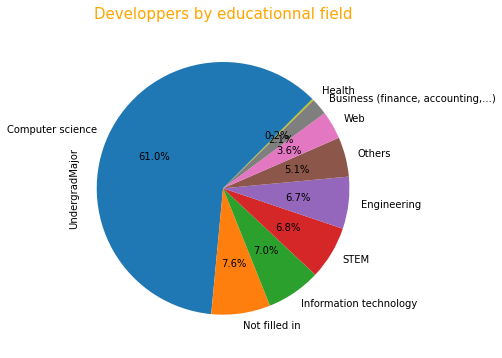

In [59]:
data_pie.plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=45,     # start angle 90° (Africa)    
                            )

plt.title('Developpers by educationnal field', fontsize=15,color = "orange")
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

There are two columns in the dataset that talk about compensation.

- One is "CompFreq". This column shows how often a developer is paid (Yearly, Monthly, Weekly).
- The other is "CompTotal". This column talks about how much the developer is paid per Year, Month, or Week depending upon his/her "CompFreq".

This makes it difficult to compare the total compensation of the developers. Here we create a new column 'NormalizedAnnualCompensation' which contains the 'Annual Compensation' irrespective of the 'CompFreq'.

In [18]:
data['CompFreq'].unique()

array(['Yearly', 'Monthly', 'Weekly', nan], dtype=object)

In [19]:
data['CompFreq']

0         Yearly
1         Yearly
2         Yearly
3        Monthly
4         Yearly
          ...   
11547     Yearly
11548     Yearly
11549     Yearly
11550     Yearly
11551        NaN
Name: CompFreq, Length: 11552, dtype: object

In [70]:
# convert every value of CompTotal in year
data['NormalizedAnnualCompensation'] = data['CompFreq']
data['NormalizedAnnualCompensation'] = data['NormalizedAnnualCompensation'].apply(lambda x : 1 if x == 'Yearly'  else 12 if  x == 'Monthly'  else 52 if x == 'Weekly' else x)
data['NormalizedAnnualCompensation']

0         1.0
1         1.0
2         1.0
3        12.0
4         1.0
         ... 
11547     1.0
11548     1.0
11549     1.0
11550     1.0
11551     NaN
Name: NormalizedAnnualCompensation, Length: 11552, dtype: float64

In [71]:
data['NormalizedAnnualCompensation'] = data.NormalizedAnnualCompensation*data.CompTotal
histo = data['NormalizedAnnualCompensation'].dropna()
histo

0         61000.0
1        138000.0
2         90000.0
3        348000.0
4         90000.0
           ...   
11546      9600.0
11547    130000.0
11548     74400.0
11549    105000.0
11550     80000.0
Name: NormalizedAnnualCompensation, Length: 10731, dtype: float64

In [94]:
# just compute average median annual salary (note : this is US salary !!)
data['NormalizedAnnualCompensation'].median()

100000.0

In [92]:
histo.to_csv('salary_distribution')

### Download database (other part of the Stackoverflow survey)
Again the data is located in S3 and already cleaning. We will make some EDA and Data Viz with SQL queries.

In [95]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2021-09-02 14:49:17--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite.2’

m4_survey_data.sqli 100%[===================>]  34.98M  18.9MB/s    in 1.8s    

2021-09-02 14:49:20 (18.9 MB/s) - ‘m4_survey_data.sqlite.2’ saved [36679680/36679680]



In [25]:
# connect to the database with API
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite")

In [28]:
# Better to do a function (sometimes connection failed)

def sql_connection():

    try:
        conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection
        print("Connection is established: Database is created in memory")

    except Error:
        print(Error)

    finally:
        conn.close()
        
sql_connection()

Connection is established: Database is created in memory


In [ ]:
#Global syntax with Python sqlite3 module

QUERY = """
SELECT …
 	FROM…
   	WHERE…
	GROUP BY…
	HAVING…
	ORDER BY…
LIMIT…;
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

In [107]:
# There is no command SHOW TABLES like Impala or MySQL for SQLite, we have to built a query for this
# Every SQLite database has an sqlite_master table that defines the schema for the database. We'll use this table to return a list of tables.

QUERY = """
SELECT name AS Table_name
   FROM sqlite_master 
WHERE type ='table' 
   AND name NOT LIKE 'sqlite_%';
"""

In [108]:
df = pd.read_sql_query(QUERY,conn)
df.head(30)

,Table_name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


In [129]:
# To describe our tables, there is no command DESCRIBE TABLE in SQLite, we use a specific SQL statement
# SELECT sql FROM sqlite_master WHERE name = 'table_name';

def describe(table_name):
    QUERY = """
    SELECT sql FROM sqlite_master
    WHERE name= '{}'
    """.format(table_name)
    df = pd.read_sql_query(QUERY,conn)
    print(df.iat[0,0]) # iat is slightly different from iloc and more suitable for displaying results

In [132]:
describe('Gender')

CREATE TABLE "Gender" (
"Respondent" INTEGER,
  "Gender" TEXT
)


In [32]:
# list columns from table master

QUERY = """
SELECT* FROM master
"""

df = pd.read_sql_query(QUERY,conn)
df.columns

Index(['index', 'Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer',
       'OpenSource', 'Employment', 'Country', 'Student', 'EdLevel',
       'UndergradMajor', 'OrgSize', 'YearsCode', 'Age1stCode', 'YearsCodePro',
       'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney', 'MgrWant', 'JobSeek',
       'LastHireDate', 'FizzBuzz', 'ResumeUpdate', 'CurrencySymbol',
       'CurrencyDesc', 'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs',
       'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev', 'CodeRevHrs', 'UnitTests',
       'PurchaseHow', 'PurchaseWhat', 'OpSys', 'BlockchainOrg', 'BlockchainIs',
       'BetterLife', 'ITperson', 'OffOn', 'SocialMedia', 'Extraversion',
       'ScreenName', 'SOVisit1st', 'SOVisitFreq', 'SOFindAnswer',
       'SOTimeSaved', 'SOHowMuchTime', 'SOAccount', 'SOPartFreq', 'SOJobs',
       'EntTeams', 'SOComm', 'WelcomeChange', 'Age', 'Trans', 'Dependents',
       'SurveyLength', 'SurveyEase'],
      dtype='object')

In [33]:
# average number of working hours per week
df['WorkWeekHrs'].median()

40.0

<AxesSubplot:xlabel='ConvertedComp', ylabel='Count'>

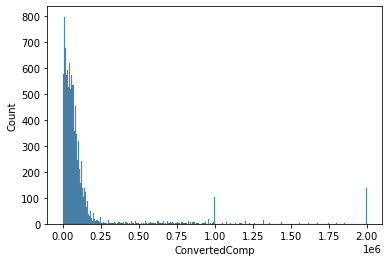

In [34]:
sns.histplot(df['ConvertedComp'])

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

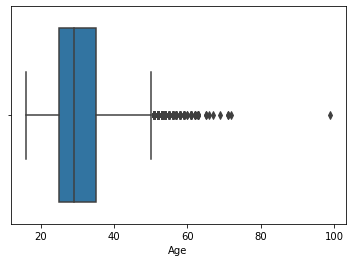

In [35]:
# to view some outliers (99 yo respondent !)
sns.boxplot(df['Age'])

In [42]:
df_median = df.groupby(['Age']).median().iloc[9:30,:]
df_median

,index,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs
Age,,,,,,
25.0,5931.0,13006.0,50000.0,39920.0,40.0,4.0
26.0,5836.0,12812.0,61000.0,43834.0,40.0,4.0
27.0,5781.5,12684.5,60000.0,49620.0,40.0,4.0
28.0,5732.0,12574.0,60000.0,51559.0,40.0,4.0
29.0,5561.0,12186.0,63700.0,55674.0,40.0,4.0
30.0,5437.0,11895.0,60000.0,56376.0,40.0,4.0
31.0,5810.0,12745.0,70000.0,66972.0,40.0,4.0
32.0,5502.0,12048.0,70000.0,65424.0,40.0,4.0
33.0,5841.0,12829.0,70000.0,68745.0,40.0,4.0


<AxesSubplot:xlabel='Age', ylabel='CompTotal'>

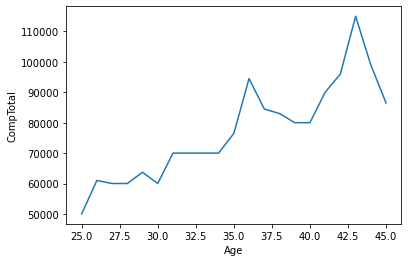

In [43]:
# compare median salary vs age
sns.lineplot(y = df_median['CompTotal'] , x = df_median.index)


In [23]:
table_name = 'DatabaseDesireNextYear'  # the table you wish to describe

QUERY = """
SELECT* FROM DatabaseDesireNextYear
"""

df = pd.read_sql_query(QUERY,conn)
df_top5 = df.groupby('DatabaseDesireNextYear').count().sort_values('Respondent', ascending = False)
df_top5 = df_top5.iloc[:5 , :]
df_top5.head()

,Respondent
DatabaseDesireNextYear,
PostgreSQL,4328
MongoDB,3649
Redis,3331
MySQL,3281
Elasticsearch,2856


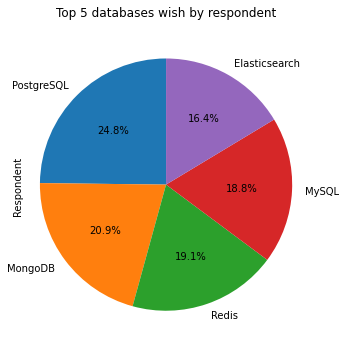

In [24]:
df_top5['Respondent'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)    
                            )

plt.title('Top 5 databases wish by respondent')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

In [22]:
table_name = 'LanguageDesireNextYear'  # the table you wish to describe

QUERY = """
SELECT* FROM LanguageDesireNextYear
"""

df = pd.read_sql_query(QUERY,conn)
df_top5 = df.groupby('LanguageDesireNextYear').count().sort_values('Respondent', ascending = False)
df_top5 = df_top5.iloc[:5 , :]
df_top5.head()

,Respondent
LanguageDesireNextYear,
JavaScript,6630
HTML/CSS,5328
Python,5239
SQL,5012
TypeScript,4088


In [21]:
table_name = 'DevType'  # the table you wish to describe

QUERY = """
SELECT* FROM DevType
"""

df = pd.read_sql_query(QUERY,conn)
df.groupby('DevType').count().sort_values(by = ['Respondent'] , ascending = False)

,Respondent
DevType,
"Developer, full-stack",6928
"Developer, back-end",6290
"Developer, front-end",3920
"Developer, desktop or enterprise applications",2575
"Developer, mobile",1959
DevOps specialist,1639
Database administrator,1413
System administrator,1202
Designer,988


In [40]:
conn.close()

## 4. Data Vizualisation

For more advanced graphics, I use IBM Cognos Analytics (with drag and drop interface) and Tableau. 

Complete dataset is downloadable at https://insights.stackoverflow.com/survey/?_ga=2.34429155.371863580.1630529590-1806640398.1629964454 under a ODbL: Open Database License.

Subset of this dataset provided by IBM are also useful 
- https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m5_survey_data_demographics.csv?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2021-01-01

- https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m5_survey_data_technologies_normalised.csv?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2021-01-01




### Link to my dashboards on IBM Cloud


https://eu-gb.dataplatform.cloud.ibm.com/dashboards/245bc86c-0c69-485e-90e7-06286ce9433f/view/7813fc1e1db039c01fc8eee407917a0e2e307054b7bbd557d4847b495d322097f36f14c2c8281a09da145137a2be1a5198

It would require tedious code to do the same with Matplotlib or Seaborn, that's why a Data Viz tool is mandatory to do great dashboards quickly.


### Link to my dashboards on Tableau (slightly different)

https://public.tableau.com/app/profile/hadrien.grimaud/viz/Data_Survey/Someotherinsights_1